<div align="center">


#                                                              **DATA/BUSINESS ANALYST MASTER PROJECT - PHASE 1**
#### End-to-End Financial Risk Analysis & Predictive Modeling, covering Python (Jupyter Lab), MySQL, and Power BI/Tableau


#🔹 **Consultant Presentation Summary**

#🎯 **Project Objective**

To analyze financial risk factors, customer creditworthiness, and insurance claims in order to predict default likelihood, assess risk categories, and provide actionable insights for better lending & claim approval strategies.

# 🛠 **Tools & Technologies**

Python (Pandas, NumPy, Matplotlib, Seaborn) – Data cleaning, preprocessing, EDA.

MySQL – Storage, queries, segmentation, and insight extraction.

Power BI / Tableau – Interactive dashboards for storytelling.

#⚡ **Challenges & Solutions**

#### Inconsistent data (negative incomes, invalid credit scores, negative claim amounts) → Cleaned & imputed missing values.

#### Data fragmentation across multiple CSVs → Merged into unified schema.

#### High dimensionality & noise → Feature engineering (risk category, debt-to-income ratio).

#### Data Pipeline to MYSQL → All options of connecting python to local MYSQL and Google colab proved abortive. I resulted to downloading the dataset and loaded it directly to MYSQL.

#### In this phase, Python was used for data cleaning, preprocessing, and initial analysis.

### **Tasks include**:
##### 1. Handling missing data,
##### 2. Detecting outliers,
##### 3. Correcting data inconsistencies,
##### 4. and Feature Enginering.
##### 5. Data Visualization and Dashboarding

#**Key Activities**

#### 1.   Cleaning inconsistent values (e.g., negative incomes, invalid credit scores)
#### 2.   Deriving new features like risk category, debt to income ratio
#### 3. Data validation and merging datasets
#### 4. Exploratory data analysis using pandas, matplotlib, seaborn







#**Brief explanation**

**“I started with three datasets: Customers, Financials, and Claims.
Customers gave the demographic and income details, Financials provided the  loan and debt-related data, and Claims contained insurance claim history.
I merged them using customer_id to create a unified dataset (df_inner) that allowed me to compute key financial risk metrics such as Debt-to-Income ratio, and analyze customer behavior holistically.”**

**Dataset Definition**

i. **Customers dataset**: Contains customer-level demographic information (e.g., customer ID, age, gender, location).

**Usage in Project**: Acts as the master reference dataset to link other datasets (financials and claims). Provides important attributes like income and credit score for financial risk analysis.

**ii.** **Financials Dataset:** Holds financial records such as loan amount, income, outstanding balance, etc.

**Usage in Project:** Provides the loan data we used to calculate metrics like Debt-to-Income Ratio (DTI). This is critical for assessing financial health and risk.

**iii. Claims Dataset**: Tracks claims or transactions related to customers (e.g., insurance claims, payment history, defaults).

**Usage in Project**:Provides insights into customer risk behaviors beyond financial loans (e.g., high claim frequency or large claim amounts can indicate higher risk).

**iv. df_inner (Merged dataset)**: The integration of all three datasets based on customer_id, allowing you to analyze financial performance, claims behavior, and customer demographics together.

**Description**: An inner join of customers + financials + claims datasets.
Why Inner Join: To ensure we only keep records for customers who exist in all three datasets (i.e., they are customers, have financial records, and have made claims).

**Outcome:** Consolidated dataset that allows cross-analysis: e.g.

i. How income relates to loan amounts.

ii. How credit score relates to claim behavior.

iii. Debt-to-Income ratio by customer segment.

iv. risk_category

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # Mount Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
!ls "/content/drive/MyDrive"

 CCCU					'Untitled form (1).gform'
'Colab Notebooks'			'Untitled form (File responses)'
'DATA BUSINESS ANALYST MASTER PROJECT'	'Untitled form.gform'
'RCCG SOLUTION GROUND'


In [ ]:
project_path = "/content/drive/MyDrive/DATA BUSINESS ANALYST MASTER PROJECT/Picture"
import os
os.chdir(project_path)

# confirm files inside
!ls

'Visual Schema of the Datasets.png'


# **Datasets Visual Schema**

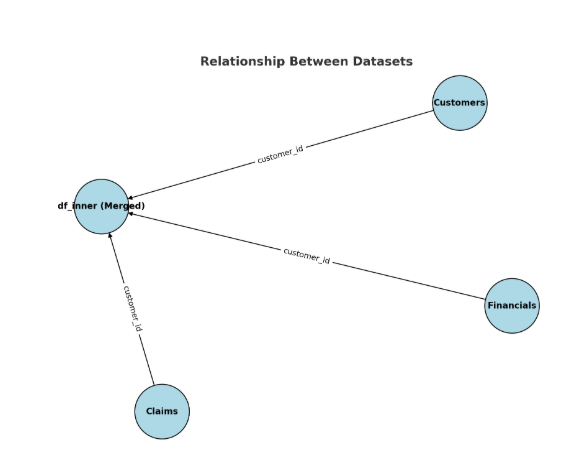

In [ ]:
from IPython.display import Image, display

display(Image("/content/drive/MyDrive/DATA BUSINESS ANALYST MASTER PROJECT/Picture/Visual Schema of the Datasets.png"))


#**1: Python (Data Engineering & EDA)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # Mount Google Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"



 CCCU					'Untitled form (1).gform'
'Colab Notebooks'			'Untitled form (File responses)'
'DATA BUSINESS ANALYST MASTER PROJECT'	'Untitled form.gform'
'RCCG SOLUTION GROUND'


In [ ]:
project_path = "/content/drive/MyDrive/DATA BUSINESS ANALYST MASTER PROJECT"
import os
os.chdir(project_path)

# confirm files inside
!ls


claims_part1.csv     customers_part2.csv      financials_part2.csv
claims_part2.csv     financial_dashboard.png  Picture
customers_part1.csv  financials_part1.csv


### **1.1 Loading Datasets**

In [ ]:
import pandas as pd
import numpy as np


# Loading customers' datasets 1 and 2
customers1 = pd.read_csv("customers_part1.csv")
customers2 = pd.read_csv("customers_part2.csv")


# Loading finacials datasets 1 and 2
financials1 = pd.read_csv("financials_part1.csv")
financials2 = pd.read_csv("financials_part2.csv")

# Loading claims' datasets 1 and 2
claims1 = pd.read_csv("claims_part1.csv")
claims2 = pd.read_csv("claims_part2.csv")

### **1.2 Merging each part of the Datasets**

a.  Merging and Inspecting customers parts

In [ ]:
df1 = pd.concat([customers1, customers2], ignore_index=True)
# df1 = customers.copy()

# Display the resulting dataframe

import IPython.display as disp
disp.display(df1.head())   # shows first 5 rows

,customer_id,name,age,income,employment_status,region,signup_date
0,10000,Robert Ewing,69,40138,Employed,South,30/11/2017 19:40
1,10001,Kayla Adkins,32,42539,Self-Employed,Central,01/11/2018 22:22
2,10002,Manuel Clark,78,55388,Self-Employed,Central,28/02/2019 11:56
3,10003,Heather Carlson,38,53068,Self-Employed,East,23/03/2021 03:31
4,10004,Eileen Bright,41,48737,Self-Employed,East,11/09/2017 03:27


In [ ]:
print("Shape:", df1.shape)
print("\nColumns:", df1.columns.tolist())


print("\nSummary:")
print(df1.describe(include="all").transpose())

Shape: (20000, 7)

Columns: ['customer_id', 'name', 'age', 'income', 'employment_status', 'region', 'signup_date']

Summary:
                     count unique               top  freq         mean  \
customer_id        20000.0    NaN               NaN   NaN      19999.5   
name                 20000  17905        John Smith    11          NaN   
age                20000.0    NaN               NaN   NaN     51.02005   
income             20000.0    NaN               NaN   NaN  49981.08125   
employment_status    20000      5           Student  4075          NaN   
region               20000      5             North  4092          NaN   
signup_date          20000  19947  27/03/2020 10:16     2          NaN   

                            std      min       25%      50%       75%  \
customer_id         5773.647028  10000.0  14999.75  19999.5  24999.25   
name                        NaN      NaN       NaN      NaN       NaN   
age                   19.343039     18.0      34.0     51.0    

In [ ]:
df1.describe().transpose()

df1.isnull().sum()

,0
customer_id,0
name,0
age,0
income,0
employment_status,0
region,0
signup_date,0


b.  Merging and Inspecting financials parts

In [ ]:
df2 = pd.concat([financials1, financials2], ignore_index=True)


# Display the resulting dataframe

import IPython.display as disp
disp.display(df2.head())   # shows first 5 rows



print("Shape:", df2.shape)
print("\nColumns:", df2.columns.tolist())

,customer_id,loan_amount,credit_score,late_payments,default_history,risk_score,risk_level
0,25786,17077,659,0,1,59,Medium
1,11913,21854,364,0,0,93,High
2,24388,14773,626,1,0,18,Low
3,28320,15323,580,0,0,8,Low
4,24417,14022,532,2,0,71,Medium


Shape: (20000, 7)

Columns: ['customer_id', 'loan_amount', 'credit_score', 'late_payments', 'default_history', 'risk_score', 'risk_level']


In [ ]:
print("\nSummary:")
print(df1.describe(include="all").transpose())


Summary:
                     count unique               top  freq         mean  \
customer_id        20000.0    NaN               NaN   NaN      19999.5   
name                 20000  17905        John Smith    11          NaN   
age                20000.0    NaN               NaN   NaN     51.02005   
income             20000.0    NaN               NaN   NaN  49981.08125   
employment_status    20000      5           Student  4075          NaN   
region               20000      5             North  4092          NaN   
signup_date          20000  19947  27/03/2020 10:16     2          NaN   

                            std      min       25%      50%       75%  \
customer_id         5773.647028  10000.0  14999.75  19999.5  24999.25   
name                        NaN      NaN       NaN      NaN       NaN   
age                   19.343039     18.0      34.0     51.0      68.0   
income             14916.401989 -17177.0   39934.5  49960.0   60027.0   
employment_status           NaN 

In [ ]:
df2.describe().transpose()



df2.isnull().sum()

,0
customer_id,0
loan_amount,0
credit_score,0
late_payments,0
default_history,0
risk_score,0
risk_level,0


c.  Merging and Inspecting claims parts

In [ ]:
df3 = pd.concat([claims1, claims2], ignore_index=True)


# Display the resulting dataframe

import IPython.display as disp
disp.display(df3.head())   # shows first 5 rows

,claim_id,customer_id,incident_date,claim_amount,claim_status,claim_type
0,50000,20974,24/11/2022 06:24,6279,Rejected,Accident
1,50001,26144,27/10/2021 23:33,7098,Rejected,Other
2,50002,28703,22/04/2021 07:07,6232,Rejected,Natural Disaster
3,50003,24691,29/08/2024 05:35,7189,Rejected,Natural Disaster
4,50004,24761,26/02/2022 02:41,8073,Approved,Accident


In [ ]:
print("Shape:", df2.shape)
print("\nColumns:", df2.columns.tolist())


print("\nSummary:")
print(df1.describe(include="all").transpose())

Shape: (20000, 7)

Columns: ['customer_id', 'loan_amount', 'credit_score', 'late_payments', 'default_history', 'risk_score', 'risk_level']

Summary:
                     count unique               top  freq         mean  \
customer_id        20000.0    NaN               NaN   NaN      19999.5   
name                 20000  17905        John Smith    11          NaN   
age                20000.0    NaN               NaN   NaN     51.02005   
income             20000.0    NaN               NaN   NaN  49981.08125   
employment_status    20000      5           Student  4075          NaN   
region               20000      5             North  4092          NaN   
signup_date          20000  19947  27/03/2020 10:16     2          NaN   

                            std      min       25%      50%       75%  \
customer_id         5773.647028  10000.0  14999.75  19999.5  24999.25   
name                        NaN      NaN       NaN      NaN       NaN   
age                   19.343039     18.

In [ ]:
df3.describe().transpose()


df3.isnull().sum()

,0
claim_id,0
customer_id,0
incident_date,0
claim_amount,0
claim_status,0
claim_type,0


### **1.3 Merging customers, financials and claims to one dataframe: A single "source of truth"**

1.3a Using left join method

In [ ]:
# The join key column is named 'customer_id' in all datasets and the JOIN method used was "LEFT"
df_left = (
    df1
    .merge(df2, on="customer_id", how="left")   # bringing in financials
    .merge(df3, on="customer_id", how="left")   # bringing in claims
)

# Displaying the unified dataframe
disp.display(df_left.head())

# Optional: quick checks
print("Shape:", df_left.shape)
print("Columns:", df_left.columns.tolist())

,customer_id,name,age,income,employment_status,region,signup_date,loan_amount,credit_score,late_payments,default_history,risk_score,risk_level,claim_id,incident_date,claim_amount,claim_status,claim_type
0,10000,Robert Ewing,69,40138,Employed,South,30/11/2017 19:40,NaN,NaN,NaN,NaN,NaN,NaN,53509.0,10/04/2023 04:58,7824.0,Approved,Other
1,10001,Kayla Adkins,32,42539,Self-Employed,Central,01/11/2018 22:22,4316.0,460.0,0.0,0.0,50.0,Low,50006.0,04/05/2020 07:26,8649.0,Rejected,Other
2,10002,Manuel Clark,78,55388,Self-Employed,Central,28/02/2019 11:56,NaN,NaN,NaN,NaN,NaN,NaN,63555.0,27/11/2022 21:39,7765.0,Rejected,Natural Disaster
3,10002,Manuel Clark,78,55388,Self-Employed,Central,28/02/2019 11:56,NaN,NaN,NaN,NaN,NaN,NaN,68894.0,13/10/2022 21:27,8832.0,Rejected,Natural Disaster
4,10003,Heather Carlson,38,53068,Self-Employed,East,23/03/2021 03:31,20330.0,765.0,4.0,0.0,72.0,Medium,NaN,NaN,NaN,NaN,NaN


Shape: (37384, 18)
Columns: ['customer_id', 'name', 'age', 'income', 'employment_status', 'region', 'signup_date', 'loan_amount', 'credit_score', 'late_payments', 'default_history', 'risk_score', 'risk_level', 'claim_id', 'incident_date', 'claim_amount', 'claim_status', 'claim_type']


In [ ]:
print("\nSummary:")
print(df_left.describe(include="all").transpose())


Summary:
                     count unique               top   freq          mean  \
customer_id        37384.0    NaN               NaN    NaN  19932.038278   
name                 37384  17905     Felicia Moyer     25           NaN   
age                37384.0    NaN               NaN    NaN     50.925316   
income             37384.0    NaN               NaN    NaN   50060.59916   
employment_status    37384      5        Unemployed   7585           NaN   
region               37384      5             North   7713           NaN   
signup_date          37384  19947  09/07/2018 22:02     25           NaN   
loan_amount        27410.0    NaN               NaN    NaN  14957.030901   
credit_score       27410.0    NaN               NaN    NaN    573.395914   
late_payments      27410.0    NaN               NaN    NaN      2.017111   
default_history    27410.0    NaN               NaN    NaN      0.099599   
risk_score         27410.0    NaN               NaN    NaN     49.829296   
ri

In [ ]:
# Duplicates
print(df_left.duplicated().sum())
print('The above result shows that there were no duplicates in the merged dataset df')


df_left.info()

0
The above result shows that there were no duplicates in the merged dataset df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37384 entries, 0 to 37383
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        37384 non-null  int64  
 1   name               37384 non-null  object 
 2   age                37384 non-null  int64  
 3   income             37384 non-null  int64  
 4   employment_status  37384 non-null  object 
 5   region             37384 non-null  object 
 6   signup_date        37384 non-null  object 
 7   loan_amount        27410 non-null  float64
 8   credit_score       27410 non-null  float64
 9   late_payments      27410 non-null  float64
 10  default_history    27410 non-null  float64
 11  risk_score         27410 non-null  float64
 12  risk_level         27410 non-null  object 
 13  claim_id           27368 non-null  float64
 14  incident_date      27368 non-null  obj

In [ ]:
df_left.isnull().sum()

print("The above results showed that there were 9,974 null values in loan amount, credit score, late payments, default history, risk score, and risk level columns respectively.")
print("In addition, there were 10,016 null values in claim_id, incident_date, claim_amount, claim_status, and claim_type columns.")
print("The next step is using another method i.e inner join ")

The above results showed that there were 9,974 null values in loan amount, credit score, late payments, default history, risk score, and risk level columns respectively.
In addition, there were 10,016 null values in claim_id, incident_date, claim_amount, claim_status, and claim_type columns.
The next step is using another method i.e inner join 


1.3b Using Inner Join Method

In [ ]:
# The join key column is named 'customer_id' in all datasets and implementing "INNER" JOIN method
df_inner = (
    df1
    .merge(df2, on="customer_id", how="inner")   # bringing in financials
    .merge(df3, on="customer_id", how="inner")   # bringing in claims
)

# Displaying the unified dataframe
disp.display(df_inner.head())

# Optional: quick checks
print("Shape:", df_inner.shape)
print("Columns:", df_inner.columns.tolist())

,customer_id,name,age,income,employment_status,region,signup_date,loan_amount,credit_score,late_payments,default_history,risk_score,risk_level,claim_id,incident_date,claim_amount,claim_status,claim_type
0,10001,Kayla Adkins,32,42539,Self-Employed,Central,01/11/2018 22:22,4316,460,0,0,50,Low,50006,04/05/2020 07:26,8649,Rejected,Other
1,10004,Eileen Bright,41,48737,Self-Employed,East,11/09/2017 03:27,21643,797,2,0,64,Medium,66043,06/11/2022 19:06,10504,Rejected,Theft
2,10004,Eileen Bright,41,48737,Self-Employed,East,11/09/2017 03:27,21643,797,2,0,64,Medium,66314,12/07/2020 04:49,9609,Under Review,Natural Disaster
3,10006,Robert Cox,39,98642,Self-Employed,East,25/09/2016 16:46,8220,415,0,1,22,Low,55216,23/02/2019 18:01,7881,Approved,Other
4,10006,Robert Cox,39,98642,Self-Employed,East,25/09/2016 16:46,8220,415,0,1,22,Low,55328,11/09/2019 22:48,11381,Rejected,Theft


Shape: (20084, 18)
Columns: ['customer_id', 'name', 'age', 'income', 'employment_status', 'region', 'signup_date', 'loan_amount', 'credit_score', 'late_payments', 'default_history', 'risk_score', 'risk_level', 'claim_id', 'incident_date', 'claim_amount', 'claim_status', 'claim_type']


1.3c Comparison of Left and Inner Join methods and ability to handle and eliminate null values

In [ ]:
print("\nMissing Data using left join method:")
print(df_left.isnull().sum())

print("\nMissing Data using inner join method:")
print(df_inner.isnull().sum())

print("\nHence, the resulting dataframe (df_inner) from using Inner join method was used for further analyses as this method helped to eliminate missing data (null values)")


Missing Data using left join method:
customer_id              0
name                     0
age                      0
income                   0
employment_status        0
region                   0
signup_date              0
loan_amount           9974
credit_score          9974
late_payments         9974
default_history       9974
risk_score            9974
risk_level            9974
claim_id             10016
incident_date        10016
claim_amount         10016
claim_status         10016
claim_type           10016
dtype: int64

Missing Data using inner join method:
customer_id          0
name                 0
age                  0
income               0
employment_status    0
region               0
signup_date          0
loan_amount          0
credit_score         0
late_payments        0
default_history      0
risk_score           0
risk_level           0
claim_id             0
incident_date        0
claim_amount         0
claim_status         0
claim_type           0
dtype: int

In [ ]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20084 entries, 0 to 20083
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        20084 non-null  int64 
 1   name               20084 non-null  object
 2   age                20084 non-null  int64 
 3   income             20084 non-null  int64 
 4   employment_status  20084 non-null  object
 5   region             20084 non-null  object
 6   signup_date        20084 non-null  object
 7   loan_amount        20084 non-null  int64 
 8   credit_score       20084 non-null  int64 
 9   late_payments      20084 non-null  int64 
 10  default_history    20084 non-null  int64 
 11  risk_score         20084 non-null  int64 
 12  risk_level         20084 non-null  object
 13  claim_id           20084 non-null  int64 
 14  incident_date      20084 non-null  object
 15  claim_amount       20084 non-null  int64 
 16  claim_status       20084 non-null  objec

##**1.4 Data Cleaning**

1.4.1. Handling Negative Values

In [ ]:
# Handle negative income in df_inner
df_inner['income'] = df_inner['income'].apply(lambda x: np.nan if x < 0 else x)

# Handle negative claim_amount in df_inner
df_inner['claim_amount'] = df_inner['claim_amount'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
print("Any negative income left? ", (df_inner['income'] < 0).any())
print("Any negative claim_amount left? ", (df_inner['claim_amount'] < 0).any())


Any negative income left?  False
Any negative claim_amount left?  False


In [ ]:
print("Summary of Negative Values Handled:")

summary = {
    "income_negatives_remaining": (df_inner['income'] < 0).sum(),
    "claim_amount_negatives_remaining": (df_inner['claim_amount'] < 0).sum(),
    "income_nans": df_inner['income'].isna().sum(),
    "claim_amount_nans": df_inner['claim_amount'].isna().sum()
}

print(summary)


Summary of Negative Values Handled:
{'income_negatives_remaining': np.int64(0), 'claim_amount_negatives_remaining': np.int64(0), 'income_nans': np.int64(10), 'claim_amount_nans': np.int64(198)}


1.4.2. Correcting Invalid credit score (>850)

In [ ]:
df_inner.loc[df_inner['credit_score'] > 850, 'credit_score'] = np.nan
print("Any credit_score > 850? ", (df_inner['credit_score'] > 850).any())
print("Number of NaNs in credit_score: ", df_inner['credit_score'].isna().sum())
print("Min credit score:", df_inner['credit_score'].min())
print("Max credit score:", df_inner['credit_score'].max())

Any credit_score > 850?  False
Number of NaNs in credit_score:  3
Min credit score: 300.0
Max credit score: 849.0


1.4.3. Missing values imputation

In [ ]:
# Ensuring numeric conversion
df_inner['income'] = pd.to_numeric(df_inner['income'], errors='coerce')
df_inner['credit_score'] = pd.to_numeric(df_inner['credit_score'], errors='coerce')
df_inner['claim_amount'] = pd.to_numeric(df_inner['claim_amount'], errors='coerce')

# Fill NaN with median safely (no inplace warning)
df_inner['income'] = df_inner['income'].fillna(df_inner['income'].median())
df_inner['credit_score'] = df_inner['credit_score'].fillna(df_inner['credit_score'].median())
df_inner['claim_amount'] = df_inner['claim_amount'].fillna(df_inner['claim_amount'].median())

# Check for any remaining missing values

df_inner[['income', 'credit_score', 'claim_amount']].isna().sum()

,0
income,0
credit_score,0
claim_amount,0


### **1.5 Feature Engineering**

1.5.1 Debt-to-Income Ratio

In [ ]:
# Compute debt-to-income ratio in df_inner
df_inner['debt_to_income_ratio'] = df_inner['loan_amount'] / df_inner['income']

# Drop duplicate columns and rename properly
df_inner = df_inner.rename(columns={'income_x': 'income'}).drop(columns=['income_y'], errors='ignore')

print(df_inner.columns)

Index(['customer_id', 'name', 'age', 'income', 'employment_status', 'region',
       'signup_date', 'loan_amount', 'credit_score', 'late_payments',
       'default_history', 'risk_score', 'risk_level', 'claim_id',
       'incident_date', 'claim_amount', 'claim_status', 'claim_type',
       'debt_to_income_ratio'],
      dtype='object')


In [ ]:
# Now calculate debt income ratio
df_inner['debt_to_income_ratio'] = df_inner['loan_amount'] / df_inner['income']
# Look at the first few rows
df_inner[['loan_amount', 'income', 'debt_to_income_ratio']].head()

,loan_amount,income,debt_to_income_ratio
0,4316,42539.0,0.101460
1,21643,48737.0,0.444077
2,21643,48737.0,0.444077
3,8220,98642.0,0.083332
4,8220,98642.0,0.083332


In [ ]:
# Income debt ratio summary statistics
df_inner['debt_to_income_ratio'].describe()

,debt_to_income_ratio
count,20084.000000
mean,0.345753
std,0.680170
min,-0.090440
25%,0.218889
50%,0.296553
75%,0.404862
max,52.867857


In [ ]:
# Check for missing or infinite values
df_inner['debt_to_income_ratio'].isna().sum()    # how many NaN
(df_inner['debt_to_income_ratio'] == np.inf).sum()   # how many infinite values

np.int64(0)

In [ ]:
# Sorted values for income debt ratio

df_inner[['customer_id','loan_amount', 'income', 'debt_to_income_ratio']].sort_values(
    by='debt_to_income_ratio', ascending=False
).head(10)

,customer_id,loan_amount,income,debt_to_income_ratio
18493,28301,14803,280.0,52.867857
18494,28301,14803,280.0,52.867857
18492,28301,14803,280.0,52.867857
8699,18478,21339,2886.0,7.393971
18653,28481,11850,2192.0,5.406022
17265,27045,17465,3632.0,4.808645
17264,27045,17465,3632.0,4.808645
1497,11519,16866,3701.0,4.557147
1496,11519,16866,3701.0,4.557147
19391,29303,20057,4590.0,4.369717


In [ ]:
# Aggregated debt_to_income_ratio by customer (e.g., take the max, mean, or first)
df_customer_ratio = (
    df_inner.groupby('customer_id')
    .agg({
        'loan_amount': 'mean',   # or 'sum', depending on your business logic
        'income': 'mean',        # usually fixed per customer, but we take mean in case of duplicates
        'debt_to_income_ratio': 'mean'  # or 'max', or 'min'
    })
    .reset_index()
)

# Now sort by debt_to_income_ratio
df_customer_ratio.sort_values(by='debt_to_income_ratio', ascending=False).head(10)

,customer_id,loan_amount,income,debt_to_income_ratio
7373,28301,14803.00,280.0,52.867857
7439,28481,11850.00,2192.0,5.406022
3459,18478,14997.00,2886.0,5.196466
6890,27045,16136.50,3632.0,4.442869
7766,29303,20057.00,4590.0,4.369717
607,11519,14196.75,3701.0,3.835923
5736,24213,15379.00,5267.0,2.919878
5058,22479,7560.00,2617.0,2.888804
6610,26344,14371.00,6121.0,2.347819
2211,15468,20398.50,9333.0,2.185632


1.5.2 Risk Category

In [ ]:
# Define the function
def risk_category(score):
    if pd.isna(score):  # handle missing values safely
        return "Unknown"
    elif score < 580:
        return "High Risk"
    elif 580 <= score < 670:
        return "Moderate Risk"
    elif 670 <= score < 740:
        return "Low Risk"
    else:
        return "Very Low Risk"

# Apply to df_inner
df_inner['risk_category'] = df_inner['credit_score'].apply(risk_category)

# Return result summary
df_inner[['customer_id', 'credit_score', 'risk_category']].head(10)

,customer_id,credit_score,risk_category
0,10001,460.0,High Risk
1,10004,797.0,Very Low Risk
2,10004,797.0,Very Low Risk
3,10006,415.0,High Risk
4,10006,415.0,High Risk
5,10006,415.0,High Risk
6,10014,568.0,High Risk
7,10014,687.0,Low Risk
8,10019,569.0,High Risk
9,10020,838.0,Very Low Risk


In [ ]:
# Count of each risk category
risk_counts = df_inner['risk_category'].value_counts().reset_index()

# Rename columns for clarity
risk_counts.columns = ['Risk Category', 'Count']

risk_counts

,Risk Category,Count
0,High Risk,10286
1,Very Low Risk,4036
2,Moderate Risk,3252
3,Low Risk,2510


### **1.6 Exploratory Data Analysis**

1.6.1 Distribution Plots (Income, Loan Amount, Credit Score, Claim Amount, and Claim Status Counts), Outlier Detection (Boxplots), and Violin Plots (Income, Loan Amount, Credit Score, Claim Amount)

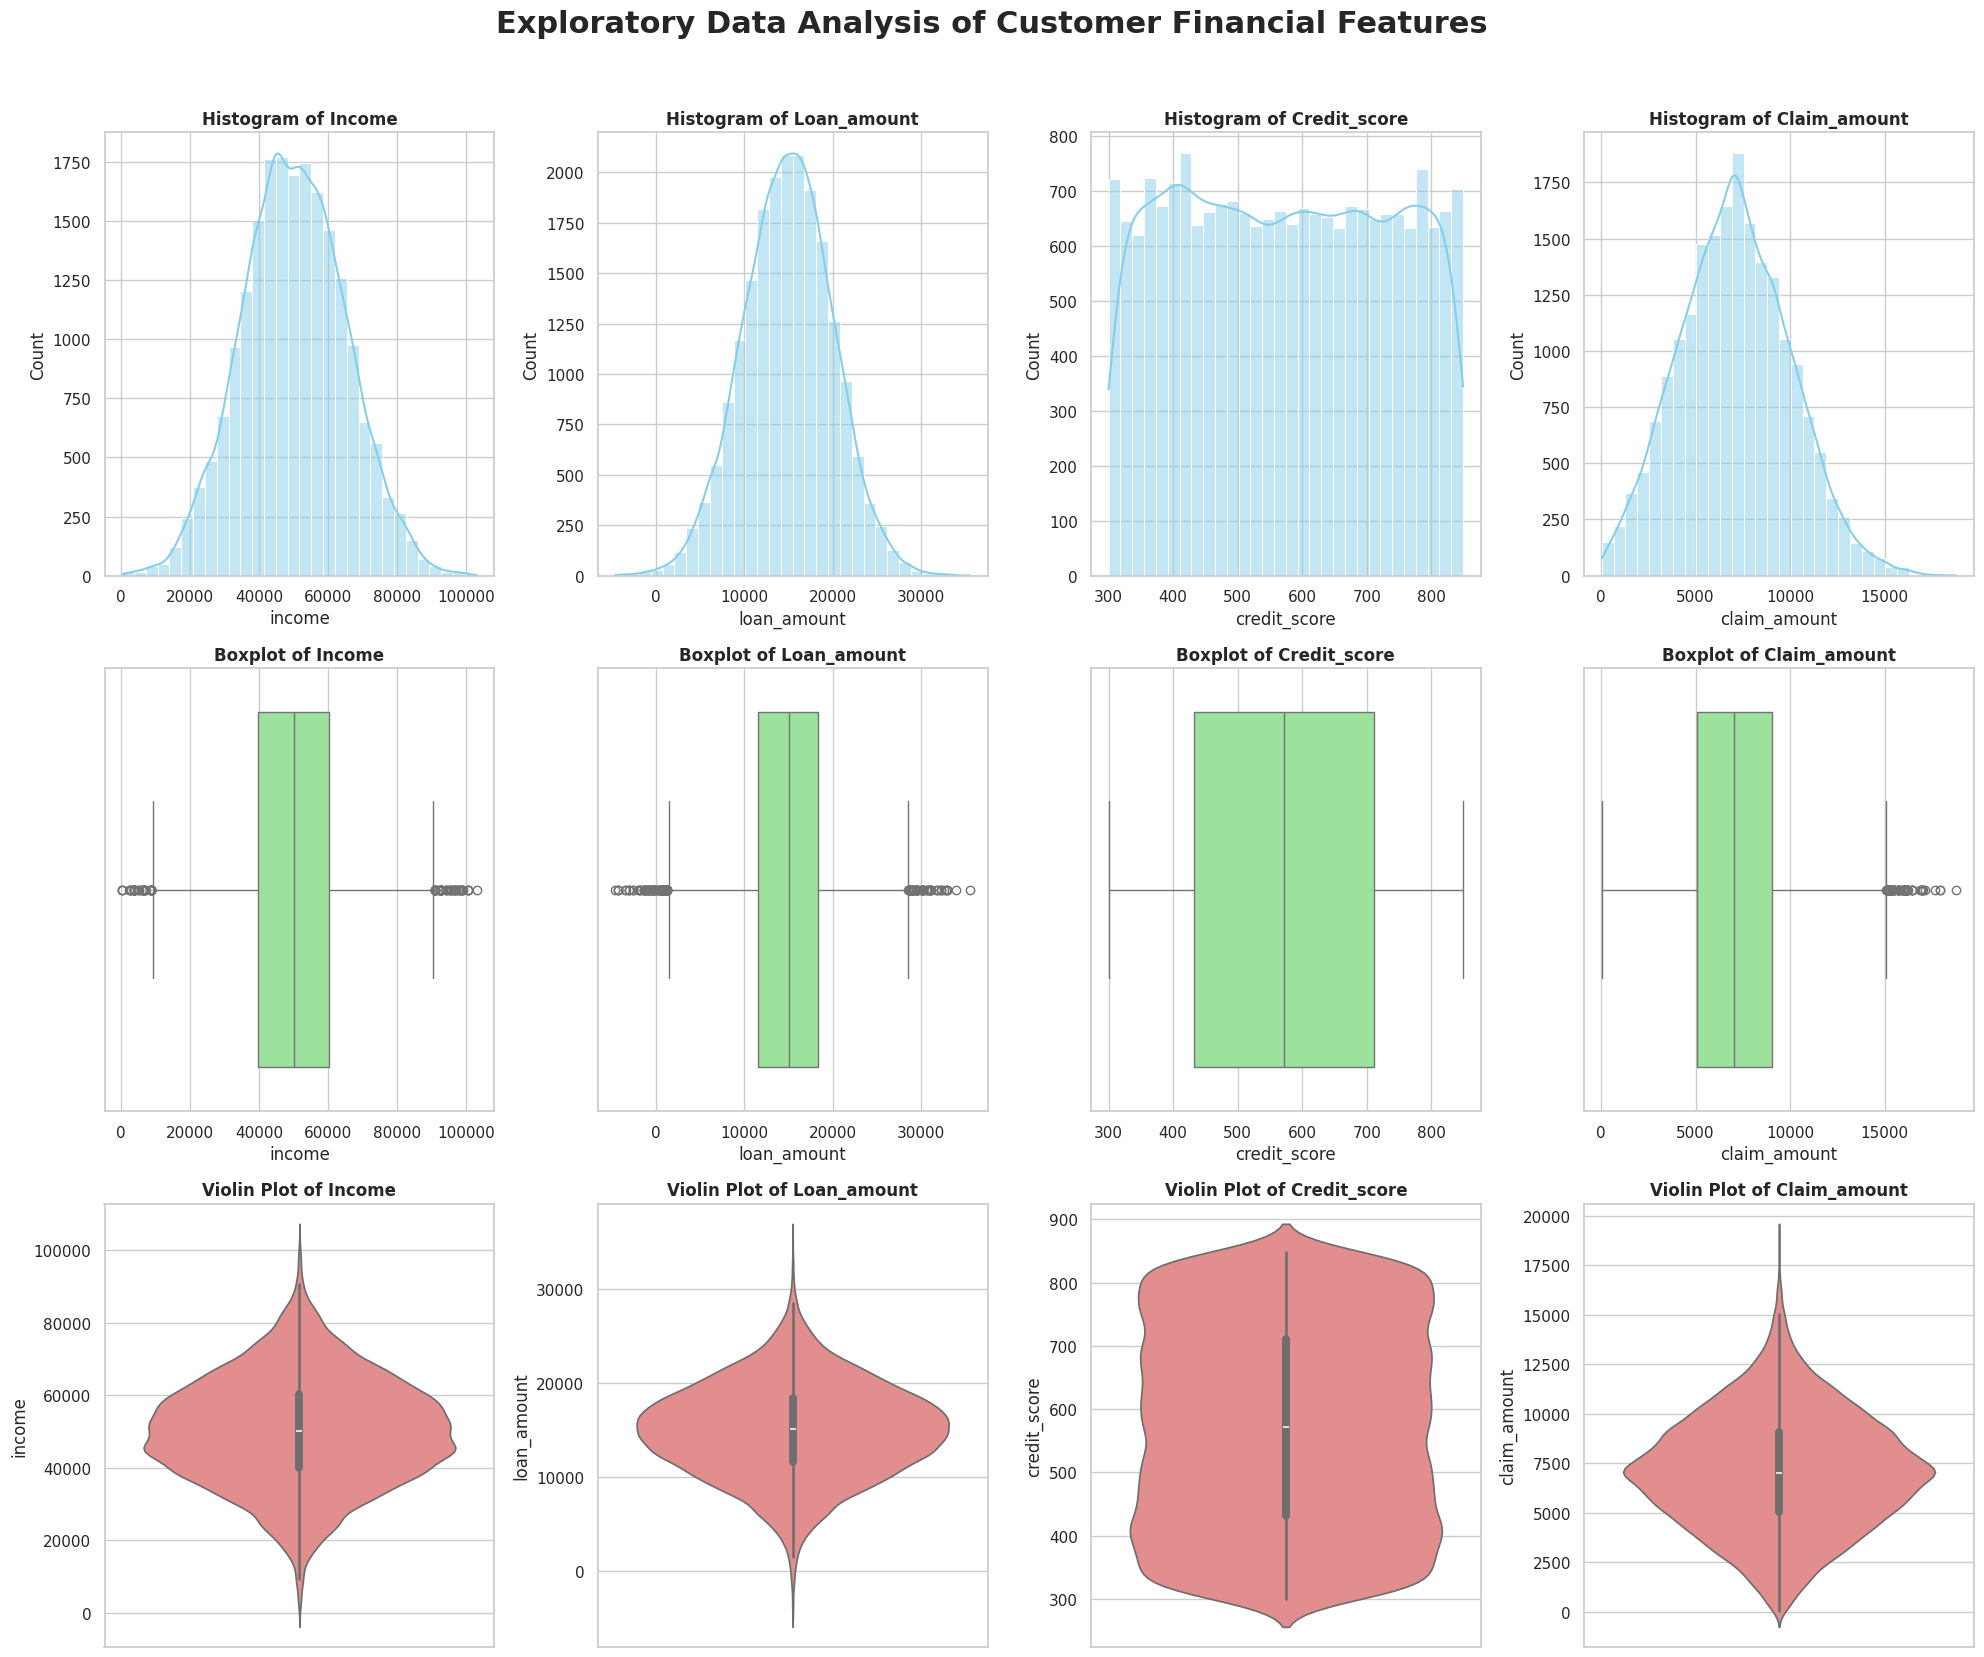

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

features = ['income', 'loan_amount', 'credit_score', 'claim_amount']

# Create a figure with 3 rows and 2x2 columns each row
fig, axes = plt.subplots(3, 4, figsize=(20, 18))  # 3 rows, 4 columns for alignment
fig.suptitle("Exploratory Data Analysis of Customer Financial Features", fontsize=22, fontweight='bold', y=0.92)

# --- Row 1: Histograms ---
for i, feature in enumerate(features):
    ax = axes[0, i]
    sns.histplot(df_inner[feature], kde=True, bins=30, ax=ax, color='skyblue')
    ax.set_title(f"Histogram of {feature.capitalize()}", fontsize=12, fontweight='bold')

# --- Row 2: Boxplots ---
for i, feature in enumerate(features):
    ax = axes[1, i]
    sns.boxplot(x=df_inner[feature], ax=ax, color='lightgreen')
    ax.set_title(f"Boxplot of {feature.capitalize()}", fontsize=12, fontweight='bold')

# --- Row 3: Violin plots ---
for i, feature in enumerate(features):
    ax = axes[2, i]
    sns.violinplot(y=df_inner[feature], inner="box", ax=ax, color='lightcoral')
    ax.set_title(f"Violin Plot of {feature.capitalize()}", fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space for the main title
plt.show()

In [ ]:
# Count and percentage of each risk category
risk_counts = df_inner['risk_category'].value_counts().reset_index()
risk_counts.columns = ['Risk Category', 'Count']

# Add percentage column
risk_counts['Percentage'] = (risk_counts['Count'] / risk_counts['Count'].sum() * 100).round(1)

risk_counts

,Risk Category,Count,Percentage
0,High Risk,10286,51.2
1,Very Low Risk,4036,20.1
2,Moderate Risk,3252,16.2
3,Low Risk,2510,12.5


### **1.7 Data Visualization & Analyses**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# ------------------------------
# KPI Calculations
# ------------------------------
approved_claims_count = (df_inner['claim_status'] == 'Approved').sum()
total_claims_entries = df_inner['claim_status'].dropna().shape[0]
claim_approval_rate = (approved_claims_count / total_claims_entries * 100) if total_claims_entries > 0 else 0

valid_loan_amount_sum = df_inner['loan_amount'].sum()
loss_ratio = (df_inner['claim_amount'].sum() / valid_loan_amount_sum * 100) if valid_loan_amount_sum > 0 else 0

avg_credit_score = df_inner['credit_score'].mean()

df_inner['default_history'] = df_inner['default_history'].fillna(df_inner['default_history'].mean())
default_rate_overall = df_inner['default_history'].mean() * 100

risk_dist = df_inner['risk_category'].value_counts(normalize=True) * 100
df_inner['loan_to_income'] = df_inner['loan_amount'] / df_inner['income']

risk_region = pd.crosstab(df_inner['region'], df_inner['risk_category'])
df_inner['incident_date'] = pd.to_datetime(df_inner['incident_date'], errors='coerce')
claims_time = df_inner.groupby(df_inner['incident_date'].dt.to_period('M'))['claim_id'].count()
claims_time.index = claims_time.index.to_timestamp()

loan_by_emp = df_inner.groupby('employment_status')['loan_amount'].sum().reset_index()
claim_counts = df_inner['claim_status'].value_counts()
default_rate_by_risk = df_inner.groupby("risk_category")["default_history"].mean().reset_index()

# ---- NEW: Credit score bins to calculate default rate ----
bins = [300, 400, 500, 600, 700, 800, 900]  # adjust if needed
labels = ["300-399", "400-499", "500-599", "600-699", "700-799", "800-899"]
df_inner["score_range"] = pd.cut(df_inner["credit_score"], bins=bins, labels=labels, right=False)
default_rate_by_score_range = df_inner.groupby("score_range")["default_history"].mean().reset_index()
default_rate_by_score_range["default_history"] *= 100  # convert to %

# Convert claims_time for interactive line
claims_df = claims_time.reset_index()
claims_df.columns = ["Month", "Claims"]

# ------------------------------
# Create Interactive Dashboard
# ------------------------------
fig = make_subplots(
    rows=4, cols=3,
    specs=[
        [{"type":"indicator"}, {"type":"indicator"}, {"type":"indicator"}],
        [{"type":"indicator"}, {"type":"domain"}, {"type":"heatmap"}],
        [{"type":"xy","colspan":2}, None, {"type":"xy"}],
        [{"type":"domain"}, {"type":"xy"}, {"type":"xy"}],
    ],
    subplot_titles=[
        "Avg Credit Score", "Default Rate (%)", "Claim Approval (%)",
        "Loss Ratio (%)", "Risk Distribution (%)", "Risk by Region",
        "Claims per Month", "Default Rate by Credit Score Range", "Loan Amount by Employment Status",
        "Claim Outcomes", "Claim Status Counts", "Default Rate by Risk Category"
    ]
)

kpi_font_size = 20

# ---- KPI cards styled ----
fig.add_trace(go.Indicator(
    mode="number",
    value=avg_credit_score,
    title={"text": "Avg Credit Score"},
    number={'valueformat':',.2f', 'font':{'size':kpi_font_size+6, 'color':"darkblue"}},
    domain={'x':[0,1],'y':[0,1]}
), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=default_rate_overall,
    title={"text": "Default Rate (%)"},
    number={'valueformat':',.2f', 'font':{'size':kpi_font_size+6, 'color':"firebrick"}}
), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=claim_approval_rate,
    title={"text": "Claim Approval (%)"},
    number={'valueformat':',.2f', 'font':{'size':kpi_font_size+6, 'color':"green"}}
), row=1, col=3)

fig.add_trace(go.Indicator(
    mode="number",
    value=loss_ratio,
    title={"text": "Loss Ratio (%)"},
    number={'valueformat':',.2f', 'font':{'size':kpi_font_size+6, 'color':"orange"}}
), row=2, col=1)

# ---- Risk Distribution Donut ----
fig.add_trace(go.Pie(
    labels=risk_dist.index,
    values=risk_dist.values,
    hole=0.4
), row=2, col=2)

# ---- Heatmap: Risk by Region ----
fig.add_trace(go.Heatmap(
    z=risk_region.values,
    x=risk_region.columns,
    y=risk_region.index,
    colorscale="YlOrRd",
    text=risk_region.values,
    hovertemplate="Region: %{y}<br>Risk: %{x}<br>Count: %{z}<extra></extra>"
), row=2, col=3)

# ---- Claims per Month ----
fig.add_trace(go.Scatter(
    x=claims_df["Month"], y=claims_df["Claims"],
    mode="lines+markers+text",
    text=claims_df["Claims"].apply(lambda x: f"{x:,}"),
    textposition="top center",
    line=dict(width=3, color="blue"),
    marker=dict(size=8),
    hovertemplate="Month: %{x|%b-%Y}<br>Claims: %{y:,}<extra></extra>"
), row=3, col=1)

# ---- NEW: Default Rate by Credit Score Range (line instead of scatter) ----
fig.add_trace(go.Scatter(
    x=default_rate_by_score_range['score_range'],
    y=default_rate_by_score_range['default_history'],
    mode="lines+markers+text",
    text=default_rate_by_score_range['default_history'].round(2).astype(str) + "%",
    textposition="top center",
    line=dict(width=3, color="red"),
    marker=dict(size=8),
    hovertemplate="Score Range: %{x}<br>Default Rate: %{y:.2f}%<extra></extra>"
), row=3, col=3)

# ---- Loan Amount by Employment Status ----
fig.add_trace(go.Bar(
    x=loan_by_emp['employment_status'],
    y=loan_by_emp['loan_amount'],
    marker=dict(color="orange"),
    text=loan_by_emp['loan_amount'].apply(lambda x: f"{x:,.0f}"),
    textposition="auto"
), row=4, col=2)

# ---- Claim Outcomes Donut ----
fig.add_trace(go.Pie(
    labels=claim_counts.index,
    values=claim_counts.values,
    hole=0.4
), row=4, col=1)

# ---- Claim Status Counts ----
fig.add_trace(go.Bar(
    x=claim_counts.index,
    y=claim_counts.values,
    marker=dict(color="teal"),
    text=pd.Series(claim_counts.values).apply(lambda x: f"{x:,}"),
    textposition="auto"
), row=4, col=2)

# ---- Default Rate by Risk Category ----
fig.add_trace(go.Bar(
    x=default_rate_by_risk['risk_category'],
    y=default_rate_by_risk['default_history'],
    marker=dict(color="crimson"),
    text=default_rate_by_risk['default_history'].apply(lambda x: f"{x:,.2f}"),
    textposition="auto"
), row=4, col=3)

# ---- Layout ----
fig.update_layout(
    height=1400, width=1500,
    title_text="📊 Financial Insurance Interactive Dashboard",
    title_font_size=24,
    showlegend=True
)

fig.show()


/tmp/ipython-input-2149386925.py:36: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import plotly.express as px
import pandas as pd

# Ensure index is datetime
claims_time.index = pd.to_datetime(claims_time.index)

# Reset index so 'Month' becomes a column
df_plot = claims_time.reset_index()
df_plot.columns = ["Month", "Claims"]

# Create interactive line chart
fig = px.line(
    df_plot,
    x="Month",
    y="Claims",
    markers=True,
    title="Claims Filed per Month",
    labels={"Month": "Month", "Claims": "Number of Claims"}
)

# Customize hover tooltip
fig.update_traces(
    hovertemplate="<b>Month:</b> %{x|%b-%Y}<br><b>Claims:</b> %{y}<extra></extra>"
)

# Improve layout
fig.update_layout(
    xaxis=dict(
        tickformat="%b-%Y",  # Month-Year format
        tickangle=45
    ),
    title_font=dict(size=18),
    xaxis_title_font=dict(size=12),
    yaxis_title_font=dict(size=12)
)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# ------------------------------
# Prepare Claims per Month
# ------------------------------
claims_time.index = pd.to_datetime(claims_time.index)
df_claims = claims_time.reset_index()
df_claims.columns = ["Month", "Claims"]

# ------------------------------
# Bin Credit Scores
# ------------------------------
# Define bins and labels
bins = [300, 500, 600, 700, 800, 900]
labels = ["300-499", "500-599", "600-699", "700-799", "800-899"]

df_inner['credit_score_bin'] = pd.cut(df_inner['credit_score'], bins=bins, labels=labels, right=False)

# Calculate default rate per credit score range
default_rate_by_bin = (
    df_inner.groupby('credit_score_bin')['default_history']
    .mean()
    .reset_index()
    .dropna()
)
default_rate_by_bin['default_rate_percent'] = default_rate_by_bin['default_history'] * 100

# ------------------------------
# Prepare Claim Status Counts
# ------------------------------
claim_counts_df = claim_counts.reset_index()
claim_counts_df.columns = ["Claim_Status", "Count"]

# ------------------------------
# Create Interactive Dashboard
# ------------------------------
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=[
        "Claims Filed per Month",
        "Credit Score Ranges vs Default Rate",
        "Claim Status Counts"
    ],
    vertical_spacing=0.15
)

# ---- Claims Filed per Month ----
fig.add_trace(
    go.Scatter(
        x=df_claims["Month"],
        y=df_claims["Claims"],
        mode="lines+markers+text",
        text=df_claims["Claims"].apply(lambda x: f"{x:,}"),
        textposition="top center",
        marker=dict(size=10, color="blue"),
        line=dict(width=3),
        hovertemplate="<b>Month:</b> %{x|%b-%Y}<br><b>Claims:</b> %{y:,}<extra></extra>"
    ),
    row=1, col=1
)

# ---- Credit Score Ranges vs Default Rate ----
fig.add_trace(
    go.Scatter(
        x=default_rate_by_bin['credit_score_bin'],
        y=default_rate_by_bin['default_rate_percent'],
        mode="lines+markers+text",
        text=default_rate_by_bin['default_rate_percent'].apply(lambda x: f"{x:.2f}%"),
        textposition="top center",
        marker=dict(size=10, color="crimson"),
        line=dict(width=3, color="crimson"),
        hovertemplate="Credit Score Range: %{x}<br>Default Rate: %{y:.2f}%<extra></extra>"
    ),
    row=2, col=1
)

# ---- Claim Status Counts ----
fig.add_trace(
    go.Bar(
        x=claim_counts_df["Claim_Status"],
        y=claim_counts_df["Count"],
        text=claim_counts_df["Count"].apply(lambda x: f"{x:,}"),
        textposition="auto",
        marker=dict(color="teal"),
        hovertemplate="Status: %{x}<br>Count: %{y:,}<extra></extra>"
    ),
    row=3, col=1
)

# ---- Layout ----
fig.update_layout(
    height=1200,
    width=1000,
    title_text="📊 Insurance Claims & Risk Dashboard",
    title_font_size=24,
    showlegend=False
)

# Format x-axis
fig.update_xaxes(row=1, col=1, tickformat="%b-%Y", tickangle=45)
fig.update_xaxes(row=2, col=1, title_text="Credit Score Range")
fig.update_yaxes(row=2, col=1, title_text="Default Rate (%)")
fig.update_yaxes(row=1, col=1, title_text="Number of Claims")
fig.update_yaxes(row=3, col=1, title_text="Count")

fig.show()


/tmp/ipython-input-3214979738.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Initial Business Insight:**

From the dashboard, analysis shows that:

a. Average credit score was 572.99

b. Default Rate was 10.1%

c. Loss Ratio (%) was 47.38

In addition, more than half (51.2%) of customers fall into the High-Risk category and 20.1% on Very Low Risk Category. Although, credit filled per month was going on a downawrad trend.

However, there is a need to know the key influencer or strongest predictor of customer risk among all the features, hence the need to run feature importance analysis.

### **1.8 Correlation and Feature Importance Analyses**

1.8.1 Correlation Heatmap (credit_score vs. default_history vs. claim_status)

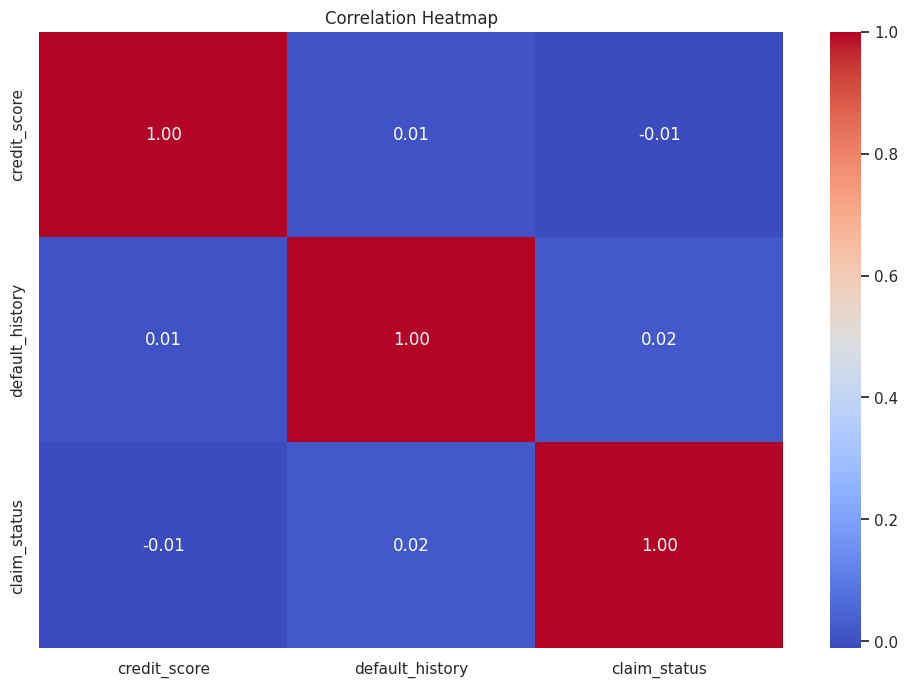

In [ ]:
# Convert categorical columns to numeric if necessary
df_inner['default_history'] = df_inner['default_history'].astype('category').cat.codes
df_inner['claim_status'] = df_inner['claim_status'].astype('category').cat.codes


#  Plot the correlation heatmap
plt.figure(figsize=(12,8))
corr = df_inner[['credit_score', 'default_history', 'claim_status']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1.8.2 Key Influencers: Credit Score determines risk


/tmp/ipython-input-59019991.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




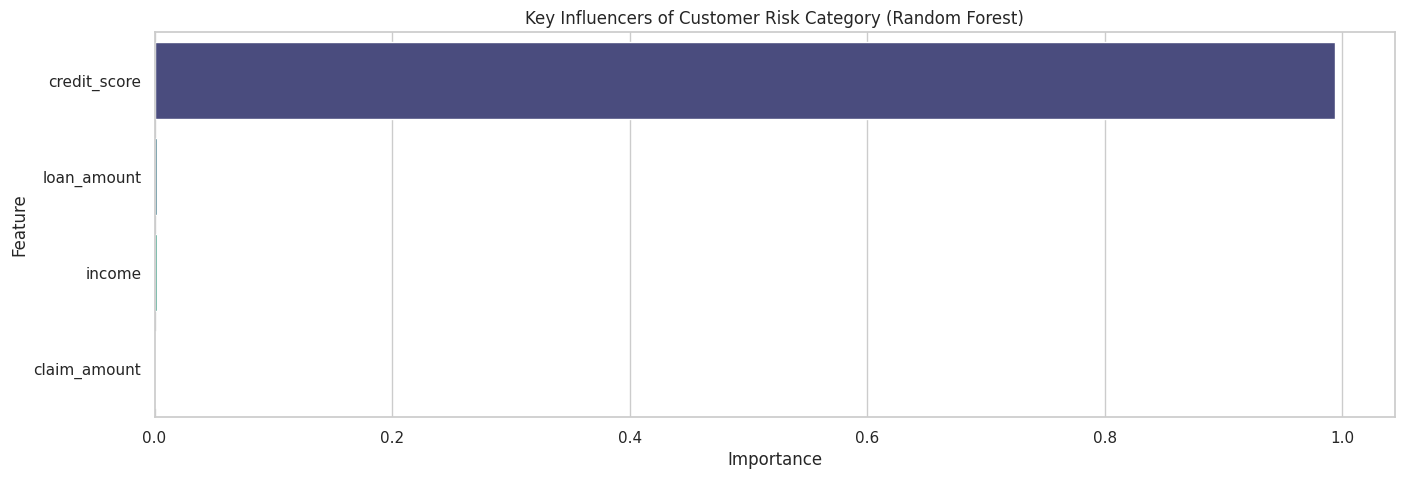

        Feature  Importance
2  credit_score    0.994217
1   loan_amount    0.002320
0        income    0.002292
3  claim_amount    0.001171


In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# df_inner is my merged dataset
# Target: risk_category (categorical)
# Features: income, loan_amount, credit_score, claim_amount, etc.

# Encoded categorical target (risk_category) into numbers
le = LabelEncoder()
df_inner['risk_category_encoded'] = le.fit_transform(df_inner['risk_category'])

# Selected features (adjust based on your dataset)
features = ['income', 'loan_amount', 'credit_score', 'claim_amount']
X = df_inner[features]
y = df_inner['risk_category_encoded']

# Trained Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(16,5))
sns.barplot(x="Importance", y="Feature", data=importances, palette="viridis")
plt.title("Key Influencers of Customer Risk Category (Random Forest)")
plt.show()

print(importances)

## **Business Insight Summary**

From the feature importance visual, credit score is the strongest predictor of customer risk, with higher scores linked to Very Low Risk  Customers (20.1%).

### **1.8.3 Translating insights into a business recommendation.**

/tmp/ipython-input-2099389712.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2099389712.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




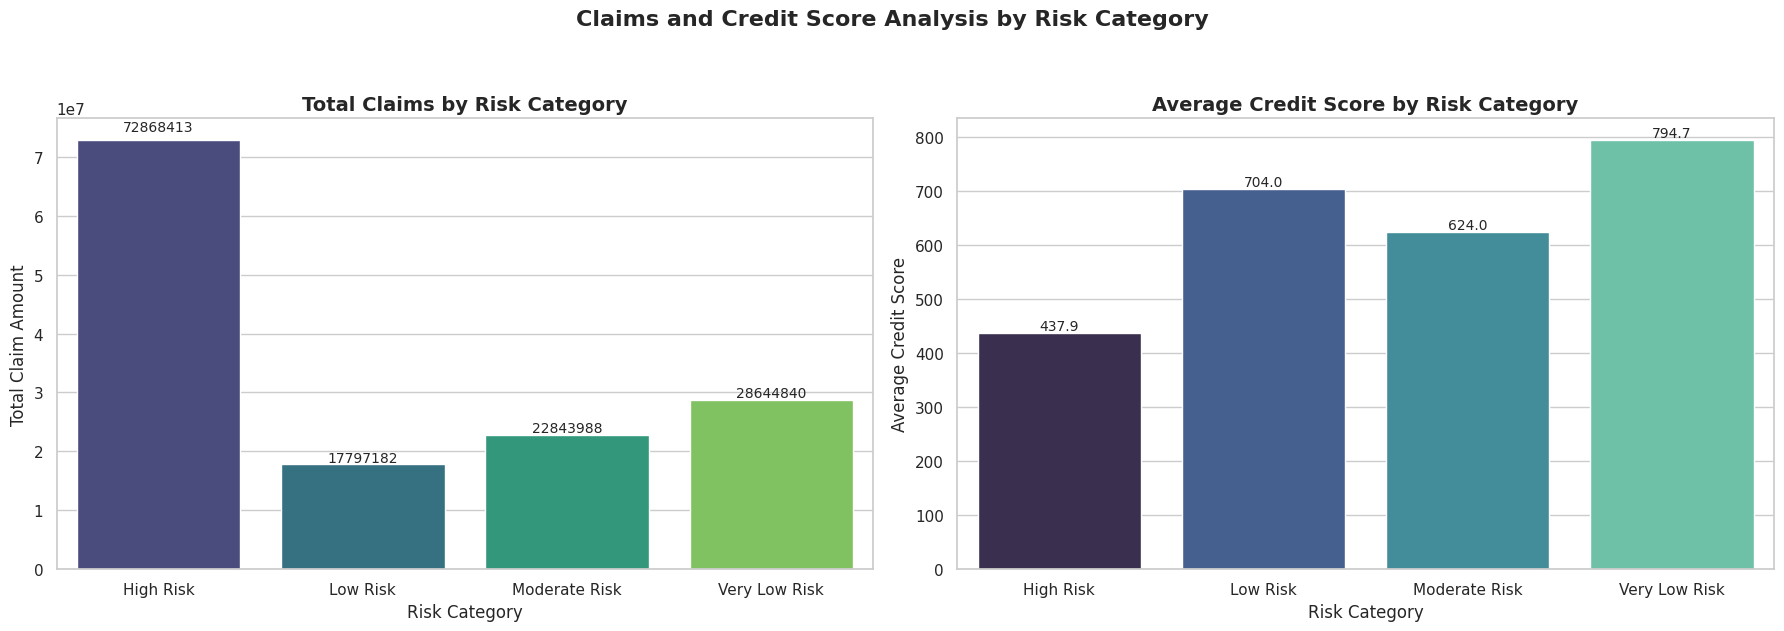

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Aggregate data ---
# Total claims by risk category
claims_by_risk = df_inner.groupby("risk_category")["claim_amount"].sum().reset_index()

# Average credit score by risk category
credit_by_risk = df_inner.groupby("risk_category")["credit_score"].mean().reset_index()

# --- Dashboard with 2 visuals ---
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Plot 1: Total claims
sns.barplot(data=claims_by_risk, x="risk_category", y="claim_amount", palette="viridis", ax=axes[0])
axes[0].set_title("Total Claims by Risk Category", fontsize=14, weight='bold')
axes[0].set_ylabel("Total Claim Amount")
axes[0].set_xlabel("Risk Category")

# Add labels on bars
for i, row in claims_by_risk.iterrows():
    axes[0].text(i, row["claim_amount"]+row["claim_amount"]*0.02,
                 f"{row['claim_amount']:.0f}", ha='center', fontsize=10)

# Plot 2: Average credit score
sns.barplot(data=credit_by_risk, x="risk_category", y="credit_score", palette="mako", ax=axes[1])
axes[1].set_title("Average Credit Score by Risk Category", fontsize=14, weight='bold')
axes[1].set_ylabel("Average Credit Score")
axes[1].set_xlabel("Risk Category")

# Add labels on bars
for i, row in credit_by_risk.iterrows():
    axes[1].text(i, row["credit_score"]+5,
                 f"{row['credit_score']:.1f}", ha='center', fontsize=10)

# Overall dashboard title
fig.suptitle("Claims and Credit Score Analysis by Risk Category", fontsize=16, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

In [ ]:
# Risk distribution (from the previous analysis)
risk_distribution = {
    "High Risk": 51.2,
    "Low Risk": 12.5,
    "Moderate Risk": 16.2,
    "Very Low Risk": 20.1
}

# Convert to DataFrame for presentation
risk_df = pd.DataFrame(list(risk_distribution.items()), columns=["Risk Category", "Percentage"])
print("Customer Risk Distribution (%):")
print(risk_df.to_string(index=False))
print("\n")

# Feature importance (assuming 'credit_score' is top influencer)
top_feature = "credit_score"

# Business rule (simple thresholding, adjust as per my dataset)
def loan_recommendation(credit_score):
    if credit_score >= 700:
        return "Very Low Risk - APPROVE LOAN WITH FAVORABLE TERMS"
    elif 600 <= credit_score < 700:
        return "Moderate Risk - APPROVE WITH CAUTION!"
    elif 500 <= credit_score < 600:
        return "High Risk - APPROVE WITH STRICT TERMS"
    else:
        return "Very High Risk - DECLINE LOAN"

# Example customers
sample_customers = [750, 680, 550, 420]  # sample credit scores
recommendations = {score: loan_recommendation(score) for score in sample_customers}

print("Loan Approval Recommendations based on Credit Score:")
for score, advice in recommendations.items():
    print(f"Customer with Credit Score {score}: {advice}")


Customer Risk Distribution (%):
Risk Category  Percentage
    High Risk        51.2
     Low Risk        12.5
Moderate Risk        16.2
Very Low Risk        20.1


Loan Approval Recommendations based on Credit Score:
Customer with Credit Score 750: Very Low Risk - APPROVE LOAN WITH FAVORABLE TERMS
Customer with Credit Score 680: Moderate Risk - APPROVE WITH CAUTION!
Customer with Credit Score 550: High Risk - APPROVE WITH STRICT TERMS
Customer with Credit Score 420: Very High Risk - DECLINE LOAN


1.8.4 Visualizing Loan Recommendations by Credit Score Range

/tmp/ipython-input-3089601368.py:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




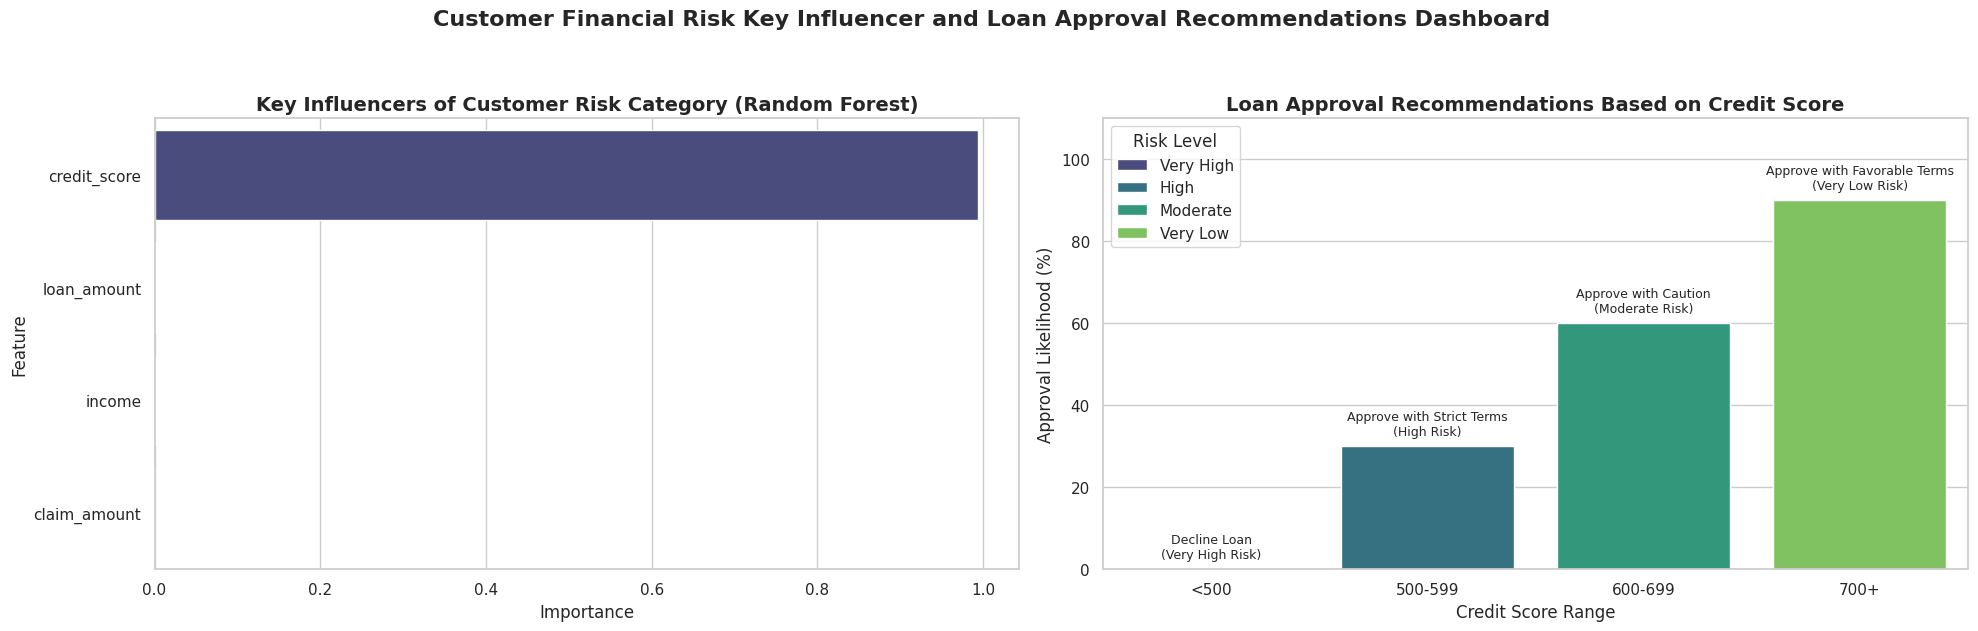

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Set style
sns.set(style="whitegrid")

# --- Random Forest Feature Importance ---
# Encode target
le = LabelEncoder()
df_inner['risk_category_encoded'] = le.fit_transform(df_inner['risk_category'])

# Features & target
features = ['income', 'loan_amount', 'credit_score', 'claim_amount']
X = df_inner[features]
y = df_inner['risk_category_encoded']

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# --- Credit Score Recommendations ---
score_ranges = ["<500", "500-599", "600-699", "700+"]
recommendations = [
    "Decline Loan\n(Very High Risk)",
    "Approve with Strict Terms\n(High Risk)",
    "Approve with Caution\n(Moderate Risk)",
    "Approve with Favorable Terms\n(Very Low Risk)"
]

rec_df = pd.DataFrame({
    "Credit Score Range": score_ranges,
    "Recommendation": recommendations,
    "Risk Level": ["Very High", "High", "Moderate", "Very Low"],
    "Approval Likelihood (%)": [0, 30, 60, 90]
})

# --- Create Dashboard ---
fig, axes = plt.subplots(1, 2, figsize=(20,6))  # 1 row, 2 columns

# Add main title for dashboard
fig.suptitle("Customer Financial Risk Key Influencer and Loan Approval Recommendations Dashboard",
             fontsize=16, fontweight='bold', y=1.05)

# Left plot: Feature Importance
sns.barplot(x="Importance", y="Feature", data=importances, palette="viridis", ax=axes[0])
axes[0].set_title("Key Influencers of Customer Risk Category (Random Forest)", fontsize=14, weight='bold')

# Right plot: Credit Score Recommendations
sns.barplot(data=rec_df, x="Credit Score Range", y="Approval Likelihood (%)",
            hue="Risk Level", dodge=False, palette="viridis", ax=axes[1])

# Add wrapped text labels
for i, row in rec_df.iterrows():
    axes[1].text(i, row["Approval Likelihood (%)"]+2, row["Recommendation"],
                 ha='center', va='bottom', fontsize=9, rotation=0)  # rotation=0 keeps text clean

# Formatting
axes[1].set_title("Loan Approval Recommendations Based on Credit Score", fontsize=14, weight='bold')
axes[1].set_ylim(0, 110)
axes[1].set_xlabel("Credit Score Range")
axes[1].set_ylabel("Approval Likelihood (%)")
axes[1].legend(title="Risk Level")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Markdown

# Display main dashboard title in Colab
display(Markdown("## Comprehensive Customer Risk & Loan Analysis Dashboard"))

# -------------------------------
# 1. Random Forest Feature Importance
# -------------------------------
le = LabelEncoder()
df_inner['risk_category_encoded'] = le.fit_transform(df_inner['risk_category'])

features = ['income', 'loan_amount', 'credit_score', 'claim_amount']
X = df_inner[features]
y = df_inner['risk_category_encoded']

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

fig1 = px.bar(importances, x='Importance', y='Feature', orientation='h',
              color='Importance', color_continuous_scale='Viridis',
              title='Key Influencers of Customer Risk Category (Random Forest)',
              text='Importance')
fig1.update_layout(yaxis={'categoryorder':'total ascending'}, title_font=dict(size=18, family='Arial', color='black'))

# -------------------------------
# 2. Claims & Credit Score Analysis
# -------------------------------
claims_by_risk = df_inner.groupby("risk_category")["claim_amount"].sum().reset_index()
fig2 = px.bar(claims_by_risk, x='risk_category', y='claim_amount',
              color='risk_category', text='claim_amount',
              title='Total Claims by Risk Category', color_discrete_sequence=px.colors.sequential.Viridis)
fig2.update_layout(showlegend=False, title_font=dict(size=16))

credit_by_risk = df_inner.groupby("risk_category")["credit_score"].mean().reset_index()
fig3 = px.bar(credit_by_risk, x='risk_category', y='credit_score',
              color='risk_category', text='credit_score',
              title='Average Credit Score by Risk Category', color_discrete_sequence=px.colors.sequential.Viridis)
fig3.update_layout(showlegend=False, title_font=dict(size=16))

# -------------------------------
# 3. Distribution of Risk Groups by Payment Default
# -------------------------------
# Ensure 'default_history' is categorical
if df_inner['default_history'].dtype in [int, float]:
    df_inner['default_history'] = df_inner['default_history'].map({0:'No', 1:'Yes'})

# Aggregate count by risk_category and default_history
risk_default = df_inner.groupby(['risk_category', 'default_history']).size().reset_index(name='Count')

fig5 = px.bar(risk_default,
             x='risk_category',
             y='Count',
             color='default_history',
             text='Count',
             title='Distribution of Risk Groups by Payment Default',
             color_discrete_sequence=px.colors.sequential.Viridis,
             barmode='stack')
fig5.update_traces(textposition='inside')
fig5.update_layout(yaxis_title='Number of Customers', xaxis_title='Risk Category')

# -------------------------------
# 4. Loan Approval Recommendations
# -------------------------------
score_ranges = ["<500", "500-599", "600-699", "700+"]
recommendations = [
    "Decline Loan (Very High Risk)",
    "Approve with Strict Terms (High Risk)",
    "Approve with Caution (Moderate Risk)",
    "Approve with Favorable Terms (Very Low Risk)"
]
rec_df = pd.DataFrame({
    "Credit Score Range": score_ranges,
    "Recommendation": recommendations,
    "Risk Level": ["Very High", "High", "Moderate", "Very Low"],
    "Approval Likelihood (%)": [0, 30, 60, 90]
})

fig4 = px.bar(rec_df, x="Credit Score Range", y="Approval Likelihood (%)",
              color="Risk Level", text="Recommendation",
              color_discrete_sequence=px.colors.sequential.Viridis,
              title="Loan Approval Recommendations Based on Credit Score")
fig4.update_traces(textposition='outside')
fig4.update_layout(title_font=dict(size=18))

# -------------------------------
# Display all figures interactively in Colab
# -------------------------------
fig1.show()
fig2.show()
fig3.show()
fig5.show()  # second-to-last
fig4.show()  # last


## Comprehensive Customer Risk & Loan Analysis Dashboard

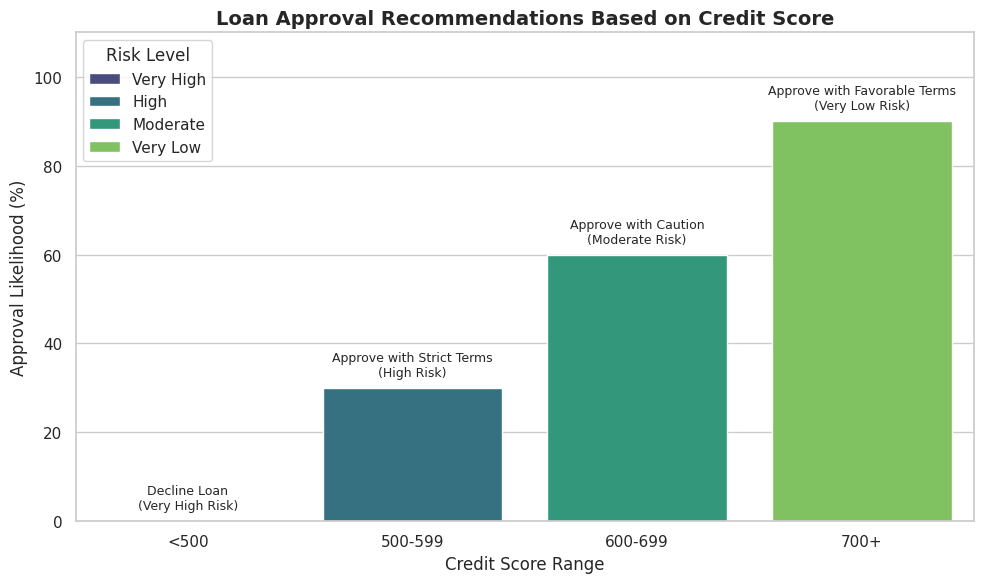

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define credit score ranges and recommendations
score_ranges = ["<500", "500-599", "600-699", "700+"]
recommendations = [
    "Decline Loan\n(Very High Risk)",
    "Approve with Strict Terms\n(High Risk)",
    "Approve with Caution\n(Moderate Risk)",
    "Approve with Favorable Terms\n(Very Low Risk)"
]

# Create a DataFrame
rec_df = pd.DataFrame({
    "Credit Score Range": score_ranges,
    "Recommendation": recommendations,
    "Risk Level": ["Very High", "High", "Moderate", "Very Low"],
    "Approval Likelihood (%)": [0, 30, 60, 90]  # Example scale
})

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=rec_df,
    x="Credit Score Range",
    y="Approval Likelihood (%)",
    hue="Risk Level",
    dodge=False,
    palette="viridis"
)

# Add wrapped text labels on bars
for i, row in rec_df.iterrows():
    plt.text(
        i,
        row["Approval Likelihood (%)"]+2,
        row["Recommendation"],
        ha='center',
        va='bottom',
        fontsize=9
    )

# Chart formatting
plt.title("Loan Approval Recommendations Based on Credit Score", fontsize=14, weight='bold')
plt.ylabel("Approval Likelihood (%)")
plt.xlabel("Credit Score Range")
plt.ylim(0, 110)
plt.legend(title="Risk Level")
plt.tight_layout()
plt.show()


# **BUSINESS RECOMMENDATIONS**

In [ ]:
print(f"Analysis shows that {risk_distribution['High Risk']}% of customers fall into the High-Risk category.")
print(f"About {risk_distribution['Very Low Risk']}% customers are on Very Low Risk Category. These are customer with high credit score")
print(f"Therefore, the company should prioritize financing customers with high credit scores to reduce claim costs and improve portfolio quality")

Analysis shows that 51.2% of customers fall into the High-Risk category.
About 20.1% customers are on Very Low Risk Category. These are customer with high credit score
Therefore, the company should prioritize financing customers with high credit scores to reduce claim costs and improve portfolio quality


In [132]:
# Save figure to local runtime
fig.savefig("eda_dashboard.png", dpi=300, bbox_inches="tight")
plt.show()

In [133]:
# Save figure directly into Google Drive folder
output_path = "/content/drive/MyDrive/DATA BUSINESS ANALYST MASTER PROJECT/eda_dashboard.png"
fig.savefig(output_path, dpi=300, bbox_inches="tight")

print("Dashboard saved to Google Drive:", output_path)

Dashboard saved to Google Drive: /content/drive/MyDrive/DATA BUSINESS ANALYST MASTER PROJECT/eda_dashboard.png


In [ ]:
# Save df_inner to a CSV file
df_inner.to_csv("df_inner.csv", index=False)

# Download the CSV file to my local machine
from google.colab import files
files.download("df_inner.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>